<a href="https://colab.research.google.com/github/XTMay/VibeCoding_ClaudeCode/blob/main/lesson-04-prompt-engineering/Guide/2_%E8%BF%AD%E4%BB%A3_Iterative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
┌───────────────┐
│   前端 (Front-end)  │
│   用户界面 (Web/App) │
└───────┬────────┘
        │ 发起请求 / 使用功能
        ▼
┌───────────────┐
│ 后端 API (Back-end API) │
│ 接收请求 → 验证 API Key │
└───────┬────────┘
        │ 调用
        ▼
┌───────────────┐
│ 商业逻辑层 (Business Logic) │
│ 数据处理、规则计算        │
└───────┬────────┘
        │ 调用
        ▼
┌───────────────┐
│ 数据存取层 (Data Access Layer) │
│ 读写数据库                  │
└───────┬────────┘
        │ 访问
        ▼
┌───────────────┐
│   数据库 (Database)    │
│ 存储用户、产品、日志等 │
└───────────────┘

----------------- 外部系统 -----------------

┌───────────────┐
│   AI 系统 API       │
│ 例如 GPT API       │
└───────┬────────┘
        │ 需要 API Key
        ▼
┌───────────────┐
│ API Key 系统        │
│ 生成、验证 Key       │
└───────────────┘
```

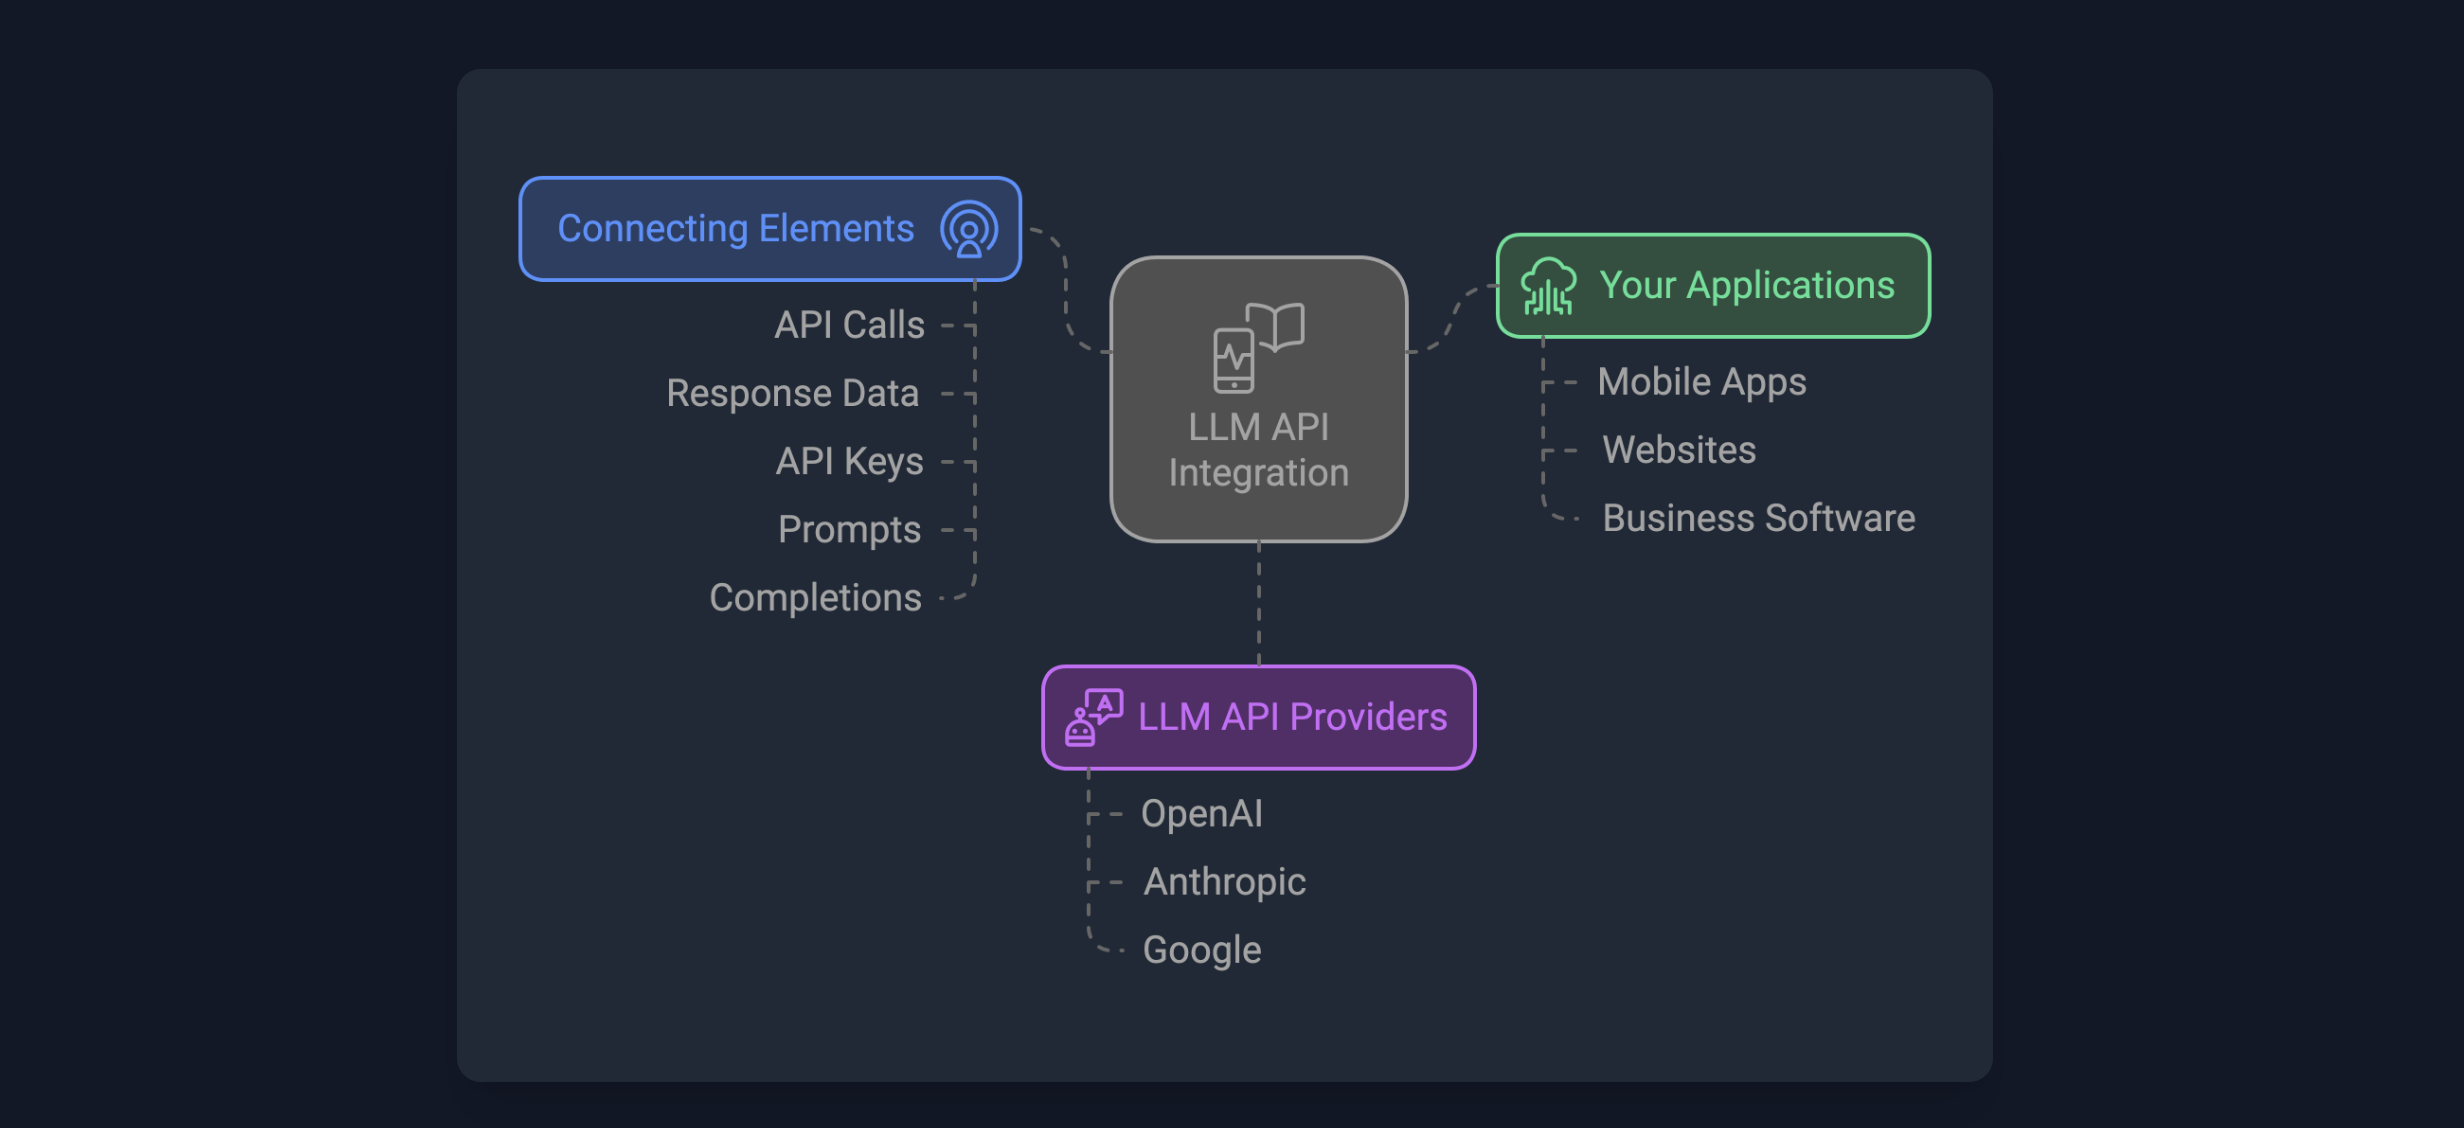

# 迭代式提示开发

当使用 LLM 构建应用程序时，我从来没有在第一次尝试中就成功使用最终应用程序中所需的 Prompt。但这并不重要，只要您有一个好的迭代过程来不断改进您的 Prompt，那么你就能够得到一个适合任务的 Prompt。我认为在提示方面，第一次成功的几率可能会高一些，但正如上所说，第一个提示是否有效并不重要。最重要的是为您的应用程序找到有效提示的过程。

因此，在本章中，我们将以从产品说明书中生成营销文案这一示例，展示一些框架，以提示你思考如何迭代地分析和完善你的 Prompt。

如果您之前与我一起上过机器学习课程，您可能见过我使用的一张图表，说明了机器学习开发的流程。通常是先有一个想法，然后再实现它：编写代码，获取数据，训练模型，这会给您一个实验结果。然后您可以查看输出结果，进行错误分析，找出它在哪里起作用或不起作用，甚至可以更改您想要解决的问题的确切思路或方法，然后更改实现并运行另一个实验等等，反复迭代，以获得有效的机器学习模型。在编写 Prompt 以使用 LLM 开发应用程序时，这个过程可能非常相似，您有一个关于要完成的任务的想法，可以尝试编写第一个 Prompt，满足上一章说过的两个原则：清晰明确，并且给系统足够的时间思考。然后您可以运行它并查看结果。如果第一次效果不好，那么迭代的过程就是找出为什么指令不够清晰或为什么没有给算法足够的时间思考，以便改进想法、改进提示等等，循环多次，直到找到适合您的应用程序的 Prompt。


## 环境配置

同上一章，我们首先需要配置使用 OpenAI API 的环境

In [ ]:
import openai
import os
from dotenv import load_dotenv, find_dotenv
# 导入第三方库

_ = load_dotenv(find_dotenv())
# 读取系统中的环境变量

openai.api_key  = os.getenv('OPENAI_API_KEY')
# 设置 API_KEY

In [ ]:
# 一个封装 OpenAI 接口的函数，参数为 Prompt，返回对应结果
def get_completion(prompt, model="gpt-3.5-turbo"):
    '''
    prompt: 对应的提示
    model: 调用的模型，默认为 gpt-3.5-turbo(ChatGPT)，有内测资格的用户可以选择 gpt-4
    '''
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=5, # 模型输出的温度系数，控制输出的随机程度
    )
    # 调用 OpenAI 的 ChatCompletion 接口
    return response.choices[0].message["content"]


In [ ]:
response

## 任务——从产品说明书生成一份营销产品描述

这里有一个椅子的产品说明书，描述说它是一个中世纪灵感家族的一部分，讨论了构造、尺寸、椅子选项、材料等等，产地是意大利。假设您想要使用这份说明书帮助营销团队为在线零售网站撰写营销式描述

In [ ]:
# 示例：产品说明书
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture,
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100)
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black,
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities:
medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [ ]:
# 提示：基于说明书生成营销描述
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. Part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, this chair is available in several options of shell color and base finishes to suit your style. Choose from plastic back and front upholstery (SWC-100) or full upholstery (SWC-110) in 10 fabric and 6 leather options.

The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. It is available with or without armrests and is qualified for contract use. The base finish options are stainless steel, matte black, gloss white, or chrome.

Measuring at a width of 53 cm, depth of 51 cm, and height of 80 cm, with a seat height of 44 cm and seat depth of 41 cm, this chair is designed for ultimate comfort. You can also choose between soft or hard-floor caster options and two choices of seat fo

In [ ]:
# 示例：产品说明书
fact_sheet_chair = """
概述

    美丽的中世纪风格办公家具系列的一部分，包括文件柜、办公桌、书柜、会议桌等。
    多种外壳颜色和底座涂层可选。
    可选塑料前后靠背装饰（SWC-100）或10种面料和6种皮革的全面装饰（SWC-110）。
    底座涂层选项为：不锈钢、哑光黑色、光泽白色或铬。
    椅子可带或不带扶手。
    适用于家庭或商业场所。
    符合合同使用资格。

结构

    五个轮子的塑料涂层铝底座。
    气动椅子调节，方便升降。

尺寸

    宽度53厘米|20.87英寸
    深度51厘米|20.08英寸
    高度80厘米|31.50英寸
    座椅高度44厘米|17.32英寸
    座椅深度41厘米|16.14英寸

选项

    软地板或硬地板滚轮选项。
    两种座椅泡沫密度可选：中等（1.8磅/立方英尺）或高（2.8磅/立方英尺）。
    无扶手或8个位置PU扶手。

材料
外壳底座滑动件

    改性尼龙PA6/PA66涂层的铸铝。
    外壳厚度：10毫米。
    座椅
    HD36泡沫

原产国

    意大利
"""

In [ ]:
# 提示：基于说明书创建营销描述
prompt = f"""
你的任务是帮助营销团队基于技术说明书创建一个产品的营销描述。

根据```标记的技术说明书中提供的信息，编写一个产品描述。

技术说明: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


产品描述：

我们自豪地推出美丽的中世纪风格办公家具系列，其中包括文件柜、办公桌、书柜、会议桌等。我们的产品采用多种外壳颜色和底座涂层，以满足您的个性化需求。您可以选择塑料前后靠背装饰（SWC-100）或10种面料和6种皮革的全面装饰（SWC-110），以使您的办公室更加舒适和时尚。

我们的底座涂层选项包括不锈钢、哑光黑色、光泽白色或铬，以满足您的不同需求。椅子可带或不带扶手，适用于家庭或商业场所。我们的产品符合合同使用资格，为您提供更加可靠的保障。

我们的产品采用五个轮子的塑料涂层铝底座，气动椅子调节，方便升降。尺寸为宽度53厘米|20.87英寸，深度51厘米|20.08英寸，高度80厘米|31.50英寸，座椅高度44厘米|17.32英寸，座椅深度41厘米|16.14英寸，为您提供舒适的使用体验。

我们的产品还提供软地板或硬地板滚轮选项，两种座椅泡沫密度可选：中等（1.8磅/立方英尺）或高（2.8磅/立方英尺），以及无扶手或8个位置PU扶手，以满足您的不同需求。

我们的产品采用改性尼龙PA6/PA66涂层的铸铝外壳底座滑动件，外壳厚度为10毫米，座椅采用HD36泡沫，为您提供更加舒适的使用体验。我们的产品原产国为意大利，为您提供更加优质的品质保证。


## 问题一：生成文本太长

它似乎很好地写了一个描述，介绍了一个惊人的中世纪灵感办公椅，很好地完成了要求，即从技术说明书开始编写产品描述。但是当我看到这个时，我会觉得这个太长了。

所以我有了一个想法。我写了一个提示，得到了结果。但是我对它不是很满意，因为它太长了，所以我会澄清我的提示，并说最多使用50个字。

因此，我通过要求它限制生成文本长度来解决这一问题

In [ ]:
# 优化后的 Prompt，要求生成描述不多于 50 词
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our beautiful medieval-style office furniture collection, including filing cabinets, desks, bookcases, and conference tables. Choose from a variety of shell colors and base coatings, with optional plastic or fabric/leather decoration. The chair features a plastic-coated aluminum base with five wheels and pneumatic height adjustment. Perfect for home or commercial use. Made in Italy.


取出回答并根据空格拆分，答案为54个字，较好地完成了我的要求

In [ ]:
lst = response.split()
print(len(lst))

54


In [ ]:
# 优化后的 Prompt，要求生成描述不多于 50 词
prompt = f"""
您的任务是帮助营销团队基于技术说明书创建一个产品的零售网站描述。

根据```标记的技术说明书中提供的信息，编写一个产品描述。

使用最多50个词。

技术规格：```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


中世纪风格办公家具系列，包括文件柜、办公桌、书柜、会议桌等。多种颜色和涂层可选，可带或不带扶手。底座涂层选项为不锈钢、哑光黑色、光泽白色或铬。适用于家庭或商业场所，符合合同使用资格。意大利制造。


In [ ]:
# 由于中文需要分词，此处直接计算整体长度
len(response)

97

LLM在遵循非常精确的字数限制方面表现得还可以，但并不那么出色。有时它会输出60或65个单词的内容，但这还算是合理的。这原因是 LLM 解释文本使用一种叫做分词器的东西，但它们往往在计算字符方面表现一般般。有很多不同的方法来尝试控制你得到的输出的长度。

## 问题二：文本关注在错误的细节上

我们会发现的第二个问题是，这个网站并不是直接向消费者销售，它实际上旨在向家具零售商销售家具，他们会更关心椅子的技术细节和材料。在这种情况下，你可以修改这个提示，让它更精确地描述椅子的技术细节。

解决方法：要求它专注于与目标受众相关的方面。

In [ ]:
# 优化后的 Prompt，说明面向对象，应具有什么性质且侧重于什么方面
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for furniture retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our beautiful medieval-style office furniture collection, including file cabinets, desks, bookcases, and conference tables. Available in multiple shell colors and base coatings, with optional plastic or fabric/leather upholstery. Features a plastic-coated aluminum base with five wheels and pneumatic chair adjustment. Suitable for home or commercial use and made with high-quality materials, including cast aluminum with a modified nylon coating and HD36 foam. Made in Italy.


In [ ]:
user_type = "家具零售商"/"个人"
info = "材料构造"

# 优化后的 Prompt，说明面向对象，应具有什么性质且侧重于什么方面
prompt = f"""
您的任务是帮助营销团队基于技术说明书创建一个产品的零售网站描述。

根据```标记的技术说明书中提供的信息，编写一个产品描述。

该描述面向{user_type}，因此应具有技术性质，并侧重于产品{info}。

使用最多50个单词。

技术规格： ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

这款中世纪风格办公家具系列包括文件柜、办公桌、书柜和会议桌等，适用于家庭或商业场所。可选多种外壳颜色和底座涂层，底座涂层选项为不锈钢、哑光黑色、光泽白色或铬。椅子可带或不带扶手，可选软地板或硬地板滚轮，两种座椅泡沫密度可选。外壳底座滑动件采用改性尼龙PA6/PA66涂层的铸铝，座椅采用HD36泡沫。原产国为意大利。


我可能进一步想要在描述的结尾包括产品ID。因此，我可以进一步改进这个提示，要求在描述的结尾，包括在技术说明中的每个7个字符产品ID。

In [ ]:
# 更进一步，要求在描述末尾包含 7个字符的产品ID
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for furniture retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

At the end of the description, include every 7-character
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our beautiful medieval-style office furniture collection, featuring file cabinets, desks, bookshelves, and conference tables. Available in multiple shell colors and base coatings, with optional plastic or fabric/leather decorations. The chair comes with or without armrests and has a plastic-coated aluminum base with five wheels and pneumatic height adjustment. Suitable for home or commercial use. Made in Italy.

Product IDs: SWC-100, SWC-110


In [ ]:
# 更进一步
prompt = f"""
您的任务是帮助营销团队基于技术说明书创建一个产品的零售网站描述。

根据```标记的技术说明书中提供的信息，编写一个产品描述。

该描述面向家具零售商，因此应具有技术性质，并侧重于产品的材料构造。

在描述末尾，包括技术规格中每个7个字符的产品ID。

使用最多50个单词。

技术规格： ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

这款中世纪风格的办公家具系列包括文件柜、办公桌、书柜和会议桌等，适用于家庭或商业场所。可选多种外壳颜色和底座涂层，底座涂层选项为不锈钢、哑光黑色、光泽白色或铬。椅子可带或不带扶手，可选塑料前后靠背装饰或10种面料和6种皮革的全面装饰。座椅采用HD36泡沫，可选中等或高密度，座椅高度44厘米，深度41厘米。外壳底座滑动件采用改性尼龙PA6/PA66涂层的铸铝，外壳厚度为10毫米。原产国为意大利。产品ID：SWC-100/SWC-110。


## 问题三：需要一个表格形式的描述

以上是许多开发人员通常会经历的迭代提示开发的简短示例。我的建议是，像上一章中所演示的那样，Prompt 应该保持清晰和明确，并在必要时给模型一些思考时间。在这些要求的基础上，通常值得首先尝试编写 Prompt ，看看会发生什么，然后从那里开始迭代地完善 Prompt，以逐渐接近所需的结果。因此，许多成功的Prompt都是通过这种迭代过程得出的。我将向您展示一个更复杂的提示示例，可能会让您对ChatGPT的能力有更深入的了解。

这里我添加了一些额外的说明，要求它抽取信息并组织成表格，并指定表格的列、表名和格式，还要求它将所有内容格式化为可以在网页使用的 HTML。

In [ ]:
# 要求它抽取信息并组织成表格，并指定表格的列、表名和格式
prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for furniture retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

At the end of the description, include every 7-character
Product ID in the technical specification.

After the description, include a table that gives the
product's dimensions. The table should have two columns.
In the first column include the name of the dimension.
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website.
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
  <p>Introducing our beautiful collection of medieval-style office furniture, including file cabinets, desks, bookcases, and conference tables. Choose from a variety of shell colors and base coatings. You can opt for plastic front and backrest decoration (SWC-100) or full decoration with 10 fabrics and 6 leathers (SWC-110). Base coating options include stainless steel, matte black, glossy white, or chrome. The chair is available with or without armrests and is suitable for both home and commercial settings. It is contract eligible.</p>
  <p>The structure features a plastic-coated aluminum base with five wheels. The chair is pneumatically adjustable for easy height adjustment.</p>
  <p>Product IDs: SWC-100, SWC-110</p>
  <table>
    <caption>Product Dimensions</caption>
    <tr>
      <td>Width</td>
      <td>20.87 inches</td>
    </tr>
    <tr>
      <td>Depth</td>
      <td>20.08 inches</td>
    </tr>
    <tr>
      <td>Height</td>
      <td>31.50 inches</td>
    </tr>
    <tr>


In [ ]:
# 表格是以 HTML 格式呈现的，加载出来
from IPython.display import display, HTML

display(HTML(response))

Width,20.87 inches
Depth,20.08 inches
Height,31.50 inches
Seat Height,17.32 inches
Seat Depth,16.14 inches


In [ ]:
# 要求它抽取信息并组织成表格，并指定表格的列、表名和格式
prompt = f"""
您的任务是帮助营销团队基于技术说明书创建一个产品的零售网站描述。

根据```标记的技术说明书中提供的信息，编写一个产品描述。

该描述面向家具零售商，因此应具有技术性质，并侧重于产品的材料构造。

在描述末尾，包括技术规格中每个7个字符的产品ID。

在描述之后，包括一个表格，提供产品的尺寸。表格应该有两列。第一列包括尺寸的名称。第二列只包括英寸的测量值。

给表格命名为“产品尺寸”。

将所有内容格式化为可用于网站的HTML格式。将描述放在<div>元素中。

技术规格：```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
<h2>中世纪风格办公家具系列椅子</h2>
<p>这款椅子是中世纪风格办公家具系列的一部分，适用于家庭或商业场所。它有多种外壳颜色和底座涂层可选，包括不锈钢、哑光黑色、光泽白色或铬。您可以选择带或不带扶手的椅子，以及软地板或硬地板滚轮选项。此外，您可以选择两种座椅泡沫密度：中等（1.8磅/立方英尺）或高（2.8磅/立方英尺）。</p>
<p>椅子的外壳底座滑动件是改性尼龙PA6/PA66涂层的铸铝，外壳厚度为10毫米。座椅采用HD36泡沫，底座是五个轮子的塑料涂层铝底座，可以进行气动椅子调节，方便升降。此外，椅子符合合同使用资格，是您理想的选择。</p>
<p>产品ID：SWC-100</p>
</div>

<table>
  <caption>产品尺寸</caption>
  <tr>
    <th>宽度</th>
    <td>20.87英寸</td>
  </tr>
  <tr>
    <th>深度</th>
    <td>20.08英寸</td>
  </tr>
  <tr>
    <th>高度</th>
    <td>31.50英寸</td>
  </tr>
  <tr>
    <th>座椅高度</th>
    <td>17.32英寸</td>
  </tr>
  <tr>
    <th>座椅深度</th>
    <td>16.14英寸</td>
  </tr>
</table>


In [ ]:
# 表格是以 HTML 格式呈现的，加载出来
from IPython.display import display, HTML

display(HTML(response))

宽度,20.87英寸
深度,20.08英寸
高度,31.50英寸
座椅高度,17.32英寸
座椅深度,16.14英寸


本章的主要内容是 LLM 在开发应用程序中的迭代式提示开发过程。开发者需要先尝试编写提示，然后通过迭代逐步完善它，直至得到需要的结果。关键在于拥有一种有效的开发Prompt的过程，而不是知道完美的Prompt。对于一些更复杂的应用程序，可以对多个样本进行迭代开发提示并进行评估。最后，可以在更成熟的应用程序中测试多个Prompt在多个样本上的平均或最差性能。在使用 Jupyter 代码笔记本示例时，请尝试不同的变化并查看结果。